In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.cluster import k_means, kmeans_plusplus, KMeans
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from joblib import dump, load

## Load Data


In [ ]:
#Load Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist = mnist[0:5000]
Xmnist = mnist["data"][0:20000]
print(Xmnist.shape)


(20000, 784)


#helper functions for digit display

In [ ]:
#Look at an image
def showDigit(digit, label, size=28):
    some_digit = digit
    #turn array into the correct shape
    some_digit_image = np.array(some_digit).reshape(size, size)
    #imshow displays an array like an image
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.title(label)
    plt.axis("off")
    plt.show()

#Display multiple digits
def showDigits(digits, labels, indexes, size=28):
    #Make a grid that is the right size
    pics = len(indexes)
    cols = 6
    rows = math.ceil(pics/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))
    plt.axis("off")

    #loop through the list of indexes, grab images and labels, plot in the "next" spot. 
    for i in range(0, pics):
        n = indexes[i]
        some_digit = digits[n:n+1]
        some_digit_image = np.array(some_digit).reshape(size, size)
        ax = axes[i//cols, i%cols]
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
        ax.set_title('Ind: {} - Lbl: {}'.format(indexes[i], labels[n]))
    plt.tight_layout()
    plt.axis("off")
    plt.show()


## Cluster 

### Scaling the data using PCA

In [ ]:
pca = PCA(0.99, whiten=True)

In [ ]:

Xmnist_fit = pca.fit_transform(Xmnist)
Xmnist_fit.shape

(20000, 329)

### Using AIC to select optimum number of clusters for the model

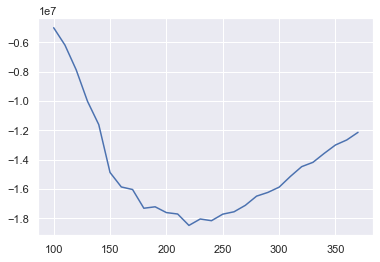

In [ ]:
n_components = np.arange(100, 380, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(Xmnist_fit).aic(Xmnist_fit) for model in models]
plt.plot(n_components, aics)

#####  -From plot 220 seems to be the number of clusters that mostly minimizes the AIC

### Making the GMM model with 220 clusters, fitting the model to the data and confirming convergence


In [ ]:
gmm = GaussianMixture(n_components = 220, covariance_type='full', random_state=0)
gmm_model=gmm.fit(Xmnist_fit)
print(gmm_model.converged_)

True


### Saving the GMM model with joblib and reloading it for use in the writeNumber function

In [ ]:
dump(gmm_model, "gmmModel.joblib")

['gmmModel.joblib']

In [ ]:
premade_gmm = load("gmmModel.joblib")

#### Writing a funtion that receives input of numbers and prints it out as a hand written number

In [ ]:
def writeNumber(new_numberList):
    new_numberList = list(str(new_numberList))
    new_numberList = [int(i) for i in new_numberList]
    #for i in new_numberList:
    new_numberList =  np.array(new_numberList)
    new_numberList = np.resize(new_numberList, (1, 329))
    print(new_numberList)
    data_new = premade_gmm.predict(new_numberList)
    data_new = data_new[0]
    data_new[0].shape
    output1 = pca.inverse_transform(data_new)
    hw_numbers = showDigits(digits=output1, indexes=len(output1))
    return hw_numbers
         

### Calling our function to see out put


##### To test my model, I have created below a function which uses the "gmm.sample()" function to generate new data for use on my model

In [ ]:
def writeNumber2(new_number):
    data_new2 = premade_gmm.sample(new_number)
    data_new2 = data_new2[0]
    data_new2[0].shape
    output2 = pca.inverse_transform(data_new2)
    hw_numbers2 = showDigits(digits=output2, labels=["one","two","three","four","five","six","seven","eight","nine","ten", "eleven", "twelve"], indexes=[0,1,2,3,4,5,6,7,8,9,10,11])
    return hw_numbers2

###### Run the below code, and Input number 12 to call the writeNumber2 function

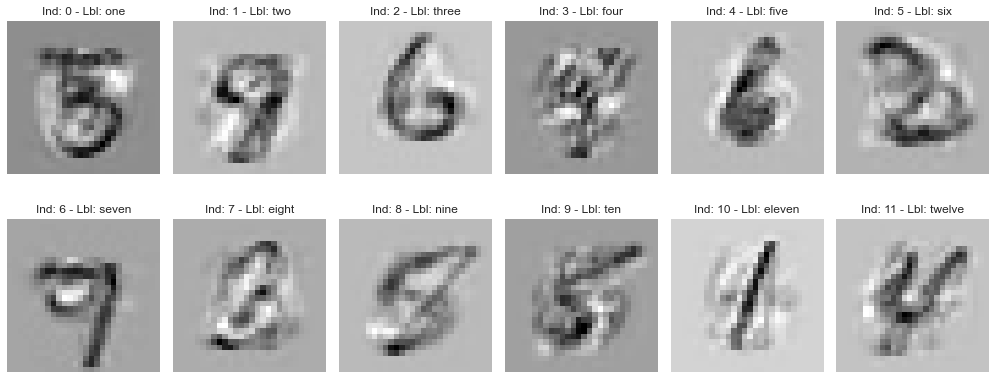

In [ ]:
new_number = int(input("Please input number: ",  ))
writeNumber2(new_number)